In [ ]:
# Carga de datos (un subset obtenido al exportar datos filtrados con R pertenecientes solo a China y a USA)
# También carga de paquetes
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
china_usa=pd.read_csv("china_usa.csv")

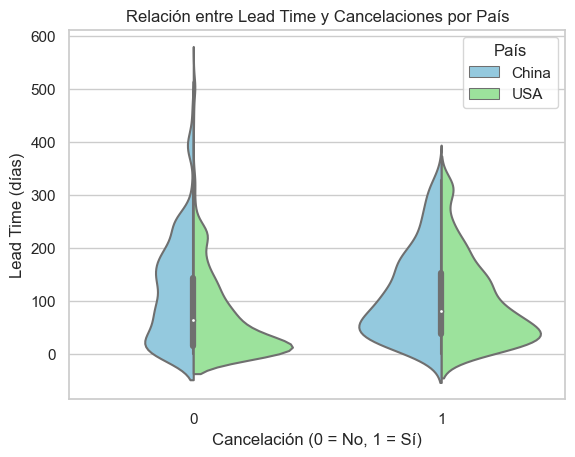

In [ ]:
# Creación de un violinplot con Seaborn
sns.violinplot(
    data=china_usa,
    x="is_canceled",
    y="lead_time",
    hue="country",
    split=True,
    palette={"China": "skyblue", "USA": "lightgreen"}
)
plt.title("Relación entre Lead Time y Cancelaciones por País")
plt.xlabel("Cancelación (0 = No, 1 = Sí)")
plt.ylabel("Lead Time (días)")
plt.legend(title="País")
plt.show()
